In [ ]:
#!pip install pandas numpy matplotlib seaborn
#!pip install scikit-learn
#!pip install pyarrow
#!pip install descartes geopandas shapely
#!pip install wordcloud

## Análise exploratória de dados

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

%matplotlib inline

## 1. Carregando e inspecionando os dados

In [47]:
df = pd.read_csv('teste_indicium_precificacao.csv',parse_dates=['ultima_review'])
df.head().T

,0,1,2,3,4
id,2595,3647,3831,5022,5099
nome,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East
host_id,2845,4632,4869,7192,7322
host_name,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris
bairro_group,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan
bairro,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill
latitude,40.75362,40.80902,40.68514,40.79851,40.74767
longitude,-73.98377,-73.9419,-73.95976,-73.94399,-73.975
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt
price,225,150,89,80,200


In [3]:
print('######Informações do dataset#########')
df.info()

######Informações do dataset#########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-nul

In [4]:
print('###### Quantidade de registros nulos por coluna #######')
df.isnull().sum()

###### Quantidade de registros nulos por coluna #######


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [5]:
print('###### Quantidade e distribuição dos valores únicos de colunas categóricas #########\n')
for coluna in df.select_dtypes(include=object).columns:
    print('#####################################################')
    print(f'Coluna: {coluna}\n')
    print(f'Qtd de valores únicos:{df[coluna].nunique()}\n')
    print(f'Amostra de valores únicos:{df[coluna].unique()[:10]}\n')
    print(f'Distribuição por valores únicos:{df[coluna].value_counts()}')
    print('#######################')

###### Quantidade e distribuição dos valores únicos de colunas categóricas #########

#####################################################
Coluna: nome

Qtd de valores únicos:47904

Amostra de valores únicos:['Skylit Midtown Castle' 'THE VILLAGE OF HARLEM....NEW YORK !'
 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park'
 'Large Cozy 1 BR Apartment In Midtown East' 'BlissArtsSpace!'
 "Large Furnished Room Near B'way " 'Cozy Clean Guest Room - Family Apt'
 'Cute & Cozy Lower East Side 1 bdrm' 'Beautiful 1br on Upper West Side']

Distribuição por valores únicos:nome
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                       

In [6]:
#Verificar a distribuição dos dados de numéricos
print('##### Estatística descritiva dos dados numéricos ######\n')
df.describe()

##### Estatística descritiva dos dados numéricos ######



,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,2018-10-04 01:46:50.710055936,1.373251,7.144005,112.776169
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,NaN,1.680453,32.952855,131.618692


Há valores duplicados de id?

In [7]:
df['id'].duplicated().sum()

0

Aparentemente não. Isso significa que o mesmo imóvel não aparece duas vezes no dataset.

In [8]:
#E quanto aos hosts? Será que existem algum com mais de um imóvel?
df['host_id'].duplicated().sum()

11437

Nota-se que há vários `host_id` duplicados, o que indica que o mesmo _host_ pode ter mais de um imóvel. Vamos ver alguns exemplos a seguir.

In [9]:
#Será que um mesmo host possui mais de um estabelecimento?
df[df['host_id'].duplicated()].sort_values(by='host_id').head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
13687,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
21555,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360
13962,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
13582,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
22727,18393354,Midtown Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75358,-73.99190,Shared room,99,1,1,2018-07-18,0.08,2,365
8301,6385039,Historic room in renovated brownstone,2881,Loli,Brooklyn,Bedford-Stuyvesant,40.68473,-73.94600,Private room,52,2,110,2019-07-01,2.63,2,220
1377,609559,Queens Quality Convenient Apartment,3647,Rafael,Queens,Elmhurst,40.73587,-73.88279,Entire home/apt,99,3,48,2019-06-23,0.58,2,301
14655,11574785,"Queen bed & Air Conditioning, views of Chatham Sq",3867,Luke,Manhattan,Chinatown,40.71380,-73.99758,Private room,95,1,80,2019-07-02,2.00,2,49
17630,13864551,Comfy Room in Amazing East Village Apt,4396,Casey,Manhattan,East Village,40.72309,-73.98428,Private room,74,1,2,2016-11-06,0.05,2,188
6698,4815886,Amazing Artist Loft,7351,Tanda,Brooklyn,South Slope,40.66442,-73.99047,Entire home/apt,254,2,8,2019-06-16,0.23,3,365


In [10]:
#Escolhendo um exemplo aleatório da lista acima...
df[df['host_id'] == 3647]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
649,246916,Quality Cozy Studio Next to Subway,3647,Rafael,Queens,Elmhurst,40.73470,-73.88066,Entire home/apt,79,4,60,2019-06-25,0.64,2,297
1377,609559,Queens Quality Convenient Apartment,3647,Rafael,Queens,Elmhurst,40.73587,-73.88279,Entire home/apt,99,3,48,2019-06-23,0.58,2,301


Perceba que, neste exemplo, o _host_ Rafael possui dois imóveis [Quality Cozy Studio Next to Subway,Queens Quality Convenient Apartment]. Esta informação, quantidade de imóveis por locatário, já foi fornecido na coluna `calculado_host_listing_count`.

Agora, vamos avaliar se os dados disponíveis na coluna `calculado_host_listing_count` realmente condiz  com a quantidade correta de acomodações disponíveis por _host_.

Vamos fazer um groupby por host_id, fazendo a simples contagem e, em seguida, tomaremos a média aritmética dos valores da vaiável `calculado_host_listings_count` para cada `host_id`. Note que, para cada `host_id` este número não varia, portanto, a média será o próprio numero, exemplo [3,3,3,3] --> media = 3.



In [11]:
df1 = df.groupby('host_id')['host_id'].count().sort_values(ascending=False).sort_index(ascending=False)

In [12]:
df2 = df.groupby('host_id')['calculado_host_listings_count'].mean().sort_values(ascending=False).astype(int).sort_index(ascending=False)
print(f'Conjunto de dados 1: \n {df1}\n Conjunto de dados 2: \n{df2}')

Conjunto de dados 1: 
 host_id
274321313    1
274311461    1
274307600    1
274298453    1
274273284    1
            ..
2868         1
2845         2
2787         5
2571         1
2438         1
Name: host_id, Length: 37457, dtype: int64
 Conjunto de dados 2: 
host_id
274321313    1
274311461    1
274307600    1
274298453    1
274273284    1
            ..
2868         1
2845         2
2787         6
2571         1
2438         1
Name: calculado_host_listings_count, Length: 37457, dtype: int64


In [13]:
(df1.index != df2.index).sum()

0

Vemos que os dataframes acima possuem os mesmos índices, neste caso, os id dos anfitriões. Finalmente, após organizar os dois dataframes

In [14]:
for i,j in zip(df1,df2):
    if i != j:
        print(f'i: {i},j:{j}')

i: 5,j:6


In [15]:
print(df1 != df2)

host_id
274321313    False
274311461    False
274307600    False
274298453    False
274273284    False
             ...  
2868         False
2845         False
2787          True
2571         False
2438         False
Length: 37457, dtype: bool


Por sorte, o único valor calculados errado é referente ao `host_id` = 2787. Vamos corrigí-lo.

In [16]:
df[df['host_id']== 2787]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
10371,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13582,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13687,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13962,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21555,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [17]:
df.loc[df['host_id']== 2787,'calculado_host_listings_count'] = 5
df[df['host_id']== 2787]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
10371,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,5,153
13582,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,5,174
13687,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,5,180
13962,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,5,180
21555,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,5,360


Pronto! Agora que já corrigimos esta informação no dataset, vamos ver como estão distribuídas algumas variáveis numéricas.

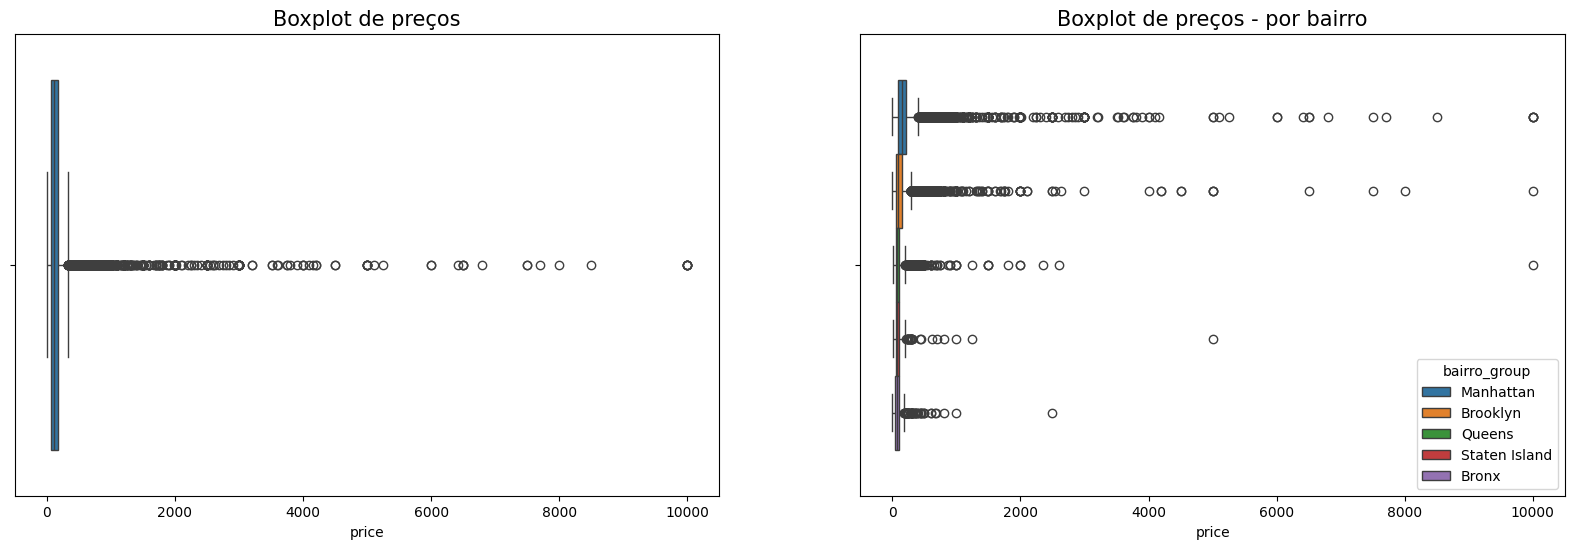

In [18]:
fig,axs = plt.subplots(1,2,figsize=(20,6))

sns.boxplot(data=df,x = 'price',ax = axs[0])
axs[0].set_title('Boxplot de preços', fontsize = 15)

sns.boxplot(data=df,x = 'price',hue = 'bairro_group', ax = axs[1])
axs[1].set_title('Boxplot de preços - por bairro', fontsize = 15)

plt.show()

Como vemos, os valores de média, mediana e quartis estão bem abaixo comparado com seus _outliers_, isso compromete a qualidade da visualização. Por isso, vamos visualizar um histograma ao invés de boxplot.

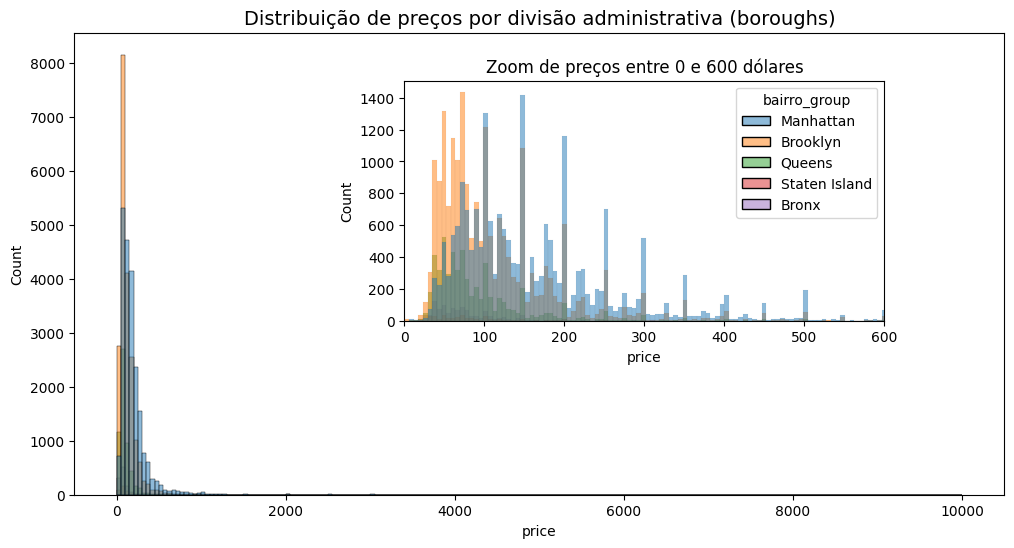

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(x = df['price'],hue = df['bairro_group'],bins=200,legend=False)
plt.title('Distribuição de preços por divisão administrativa (boroughs)',fontsize = 14)

ax2 = plt.axes([0.4, 0.4, .4, .4])
sns.histplot(x = df['price'],hue = df['bairro_group'], ax=ax2)
xlim = [0,600]
ax2.set_title(f'Zoom de preços entre {xlim[0]} e {xlim[-1]} dólares')
ax2.set_xlim(xlim)

plt.show()

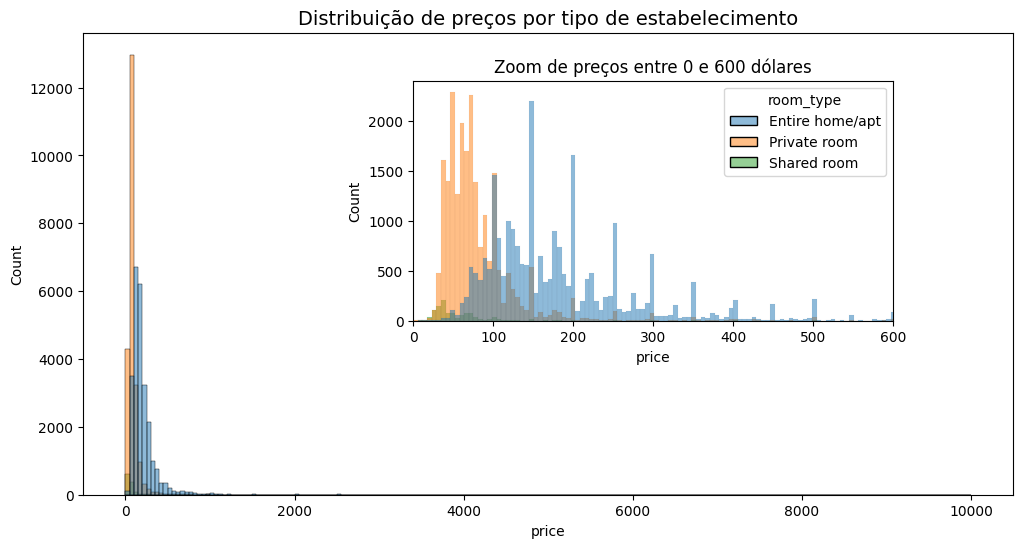

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(x = df['price'],hue = df['room_type'],bins=200,legend=False)
plt.title('Distribuição de preços por tipo de estabelecimento',fontsize = 14)

ax2 = plt.axes([0.4, 0.4, .4, .4])
sns.histplot(x = df['price'],hue = df['room_type'], ax=ax2)
xlim = [0,600]
ax2.set_title(f'Zoom de preços entre {xlim[0]} e {xlim[-1]} dólares')
ax2.set_xlim(xlim)
plt.show()

Vemos dos gráficos acima que a localidade com maiores valores de locação é Manhattan. Também vemos que espaços completos (_Entire home/apt_) são sistematicamente mais caros, seguido por quartos inteiros (_private rooms_) e, por último, quartos compartilhados (_shared rooms_). Estas conclusões também podem ser confirmadas por meio de tabela, como mostrado a seguir. 

In [44]:
print('########### TABELA 01: Estatística descritiva dos preços por bairro e por tipo de acomodação.#########')
df_valormedio_porbairro = df.groupby(by=['bairro_group','room_type'])['price'].mean().reset_index()
df_valormedio_porbairro = df_valormedio_porbairro.rename(columns={'price': 'preco'})
df_valormedio_porbairro['mediana'] = df.groupby(by=['bairro_group','room_type'])['price'].median().values
df_valormedio_porbairro['desvio_padrao'] = df.groupby(by=['bairro_group','room_type'])['price'].std().values
df_valormedio_porbairro['preco_minimo'] = df.groupby(by=['bairro_group','room_type'])['price'].min().values
df_valormedio_porbairro['preco_maximo'] = df.groupby(by=['bairro_group','room_type'])['price'].max().values
display(df_valormedio_porbairro.sort_values(by='preco', ascending=False))
print('######################################################################################################')

########### TABELA 01: Estatística descritiva dos preços por bairro e por tipo de acomodação.#########


,bairro_group,room_type,preco,mediana,desvio_padrao,preco_minimo,preco_maximo
6,Manhattan,Entire home/apt,249.239109,191.0,331.830132,0,10000
3,Brooklyn,Entire home/apt,178.327545,145.0,226.415825,0,10000
12,Staten Island,Entire home/apt,173.846591,100.0,394.600216,48,5000
9,Queens,Entire home/apt,147.050573,120.0,129.383208,10,2600
0,Bronx,Entire home/apt,127.506596,100.0,95.027102,28,1000
7,Manhattan,Private room,116.776622,90.0,190.191318,10,9999
8,Manhattan,Shared room,88.977083,69.0,92.416534,10,1000
4,Brooklyn,Private room,76.492942,65.0,124.717574,0,7500
10,Queens,Private room,71.762456,60.0,180.506756,10,10000
11,Queens,Shared room,69.020202,37.0,171.000607,11,1800


######################################################################################################


A tabela acima traz dois pontos interessantes que merecem discussão: 

i) O desvio padrão é, para a maioria das localidades e tipos de estabelecimentos, maior que a própria média. Isso indica que aqueles outliers mostrados no boxplot anterior afetam consideravelmente o cálculo das médias. 

ii) Alguns estabelecimentos possuem preço mínimo igual a zero! Provavelmente isso é um erro, já que trata-se de uma plataforma onde as pessoas alugam seus espaços em troca de dinheiro. Outra opção é que estes estabelecimentos sejam algum espaço comunitário. Vamos ver se existe alguma menção a isso no _dataset_.

In [27]:
df.loc[df['price']==0]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


Comforme vemos na descrição dos espaços, não parece haver nenhuma menção a espaço comunitário gratuito. Portanto, vamos tratar estes valores como erros.

Agora vamos ver como está distribuída a coluna `minimo_noites`e `numero_de_reviews`.  

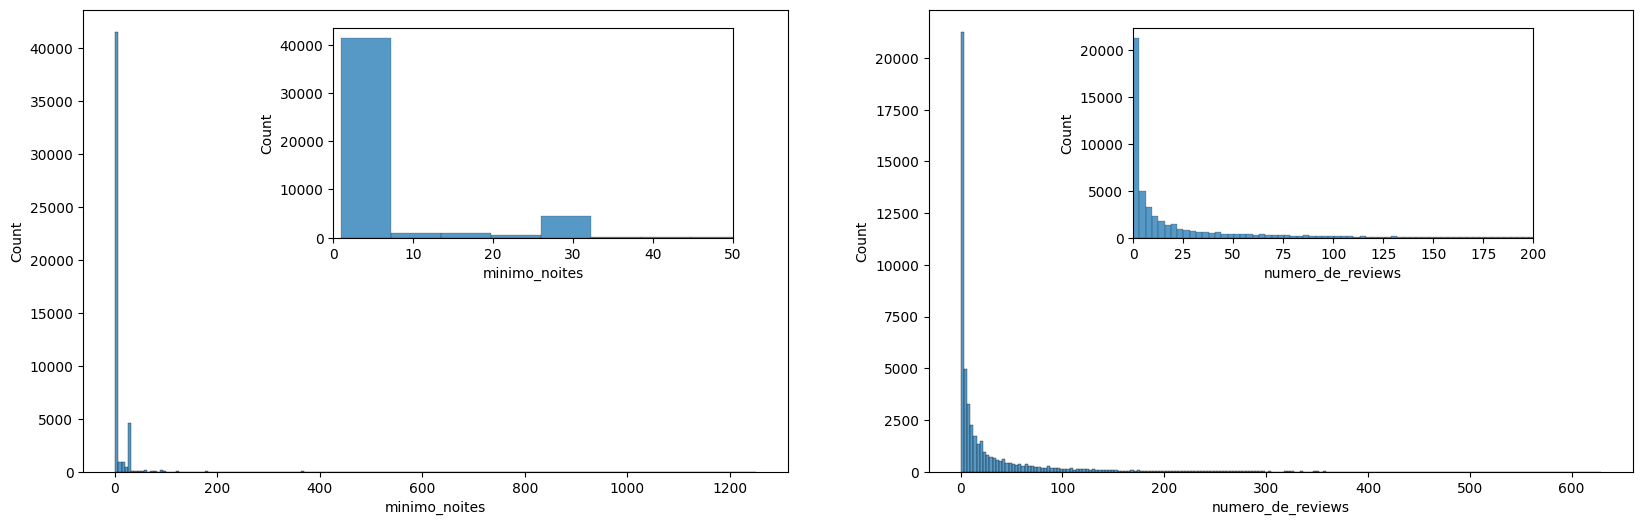

In [34]:
fig,axs = plt.subplots(1,2,figsize=(20,6))

sns.histplot(data=df,x = 'minimo_noites',ax = axs[0],bins=200,legend=False)
axs[0].set_title('', fontsize = 15)
ax0 = plt.axes([0.25, 0.5, .2, .35])
sns.histplot(data=df,x = 'minimo_noites',ax = ax0,bins=200)
ax0.set_xlim([0,50])

sns.histplot(data=df,x = 'numero_de_reviews', ax = axs[1],bins=200,legend=False)
axs[1].set_title('', fontsize = 15)
ax1 = plt.axes([0.65, 0.5, .2, .35])
sns.histplot(data=df,x = 'numero_de_reviews', ax = ax1,bins=200)
ax1.set_xlim([0,200])

plt.show()

In [35]:
df['minimo_noites'].min(),df['minimo_noites'].max()//365,df['minimo_noites'].max()%365//30

(1, 3, 5)

In [36]:
df[df['minimo_noites']> 364].sort_values(by='minimo_noites').nunique()

id                               43
nome                             42
host_id                          43
host_name                        41
bairro_group                      5
bairro                           29
latitude                         43
longitude                        43
room_type                         3
price                            37
minimo_noites                     9
numero_de_reviews                15
ultima_review                    24
reviews_por_mes                  20
calculado_host_listings_count     6
disponibilidade_365              19
dtype: int64

É curioso que, na distribuição de minimos de noites mostrada acima, temos valores variando de uma noite até 3 anos e cinco meses. Destes, apenas 43 são maior ou igual a um ano (> 364 dias). 

Agora vamos procurar por alguma relação entre o mínimo de noites e o numero de reviews com o preço do imóvel.

In [37]:
#Primeiro, vamos ver a correlação entre eles. 
df.corr(numeric_only=True)

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.291810,0.133277,0.085541
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.296406,0.154953,0.203535
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019524,-0.010926
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114712,0.082751
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009418,0.185835
calculado_host_listings_count,0.133277,0.154953,0.019524,-0.114712,0.057472,0.127960,-0.072376,-0.009418,1.000000,0.225709
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225709,1.000000


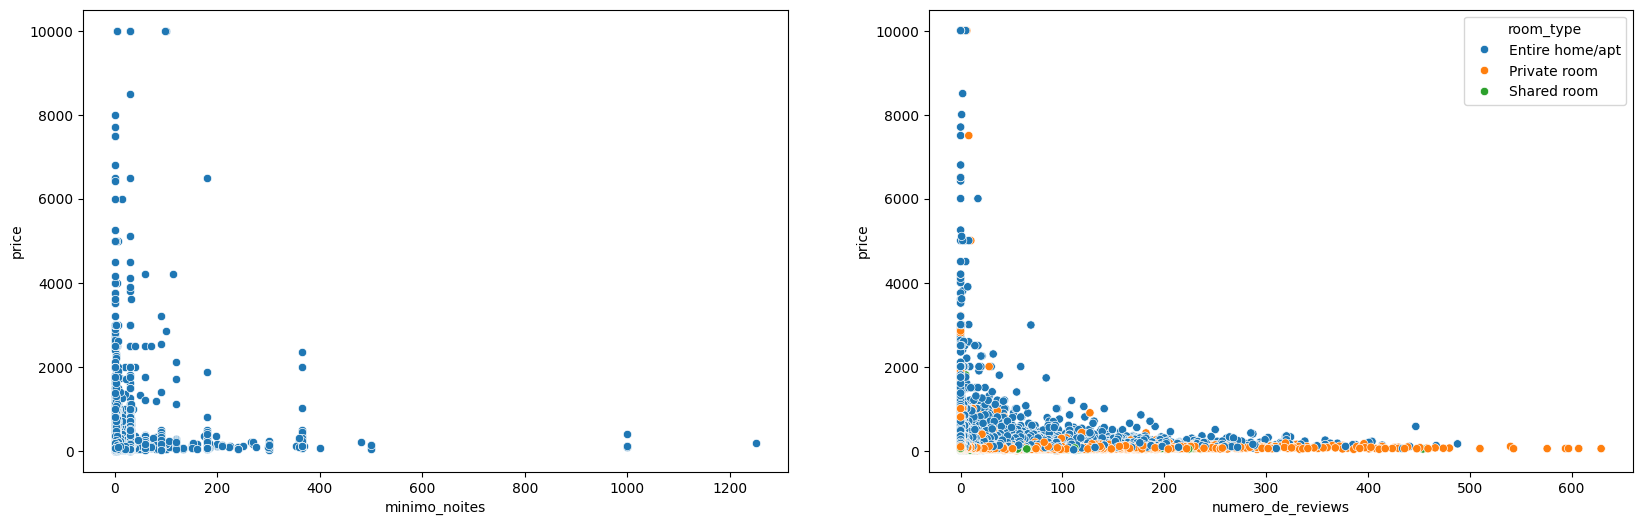

In [40]:
#Agora, vamos ver em um gráfico de dispersão
fig,axs = plt.subplots(1,2,figsize=(20,6))

sns.scatterplot(data=df,x = 'minimo_noites',y = 'price', ax = axs[0])
sns.scatterplot(data=df,x = 'numero_de_reviews' ,y = 'price', hue = 'room_type',ax=axs[1])
#plt.xlim([0,400])
#plt.ylim([0,400])
plt.show()

Não fica evidente nenhuma relação entre o número minimo de noites e o número de reviews com o preço do estabelecimento. 


Agora vamos ver o que a variável nome da acomodaçãopode nos trazer de informação relevante.

In [52]:
def convert_str2lower(serie):
    return serie.lower()
    
df['nome'] = df['nome'].astype(str).apply(convert_str2lower)
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,the village of harlem....new york !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
2,3831,cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [56]:
df_nomes_duplicados = df[df['nome'].duplicated()]
df_nomes_duplicados.sort_values(by='nome')
df_nomes_duplicados['nome'].sort_values()

15350                  *lovely apt in heart of park slope*
34351    *no guest service fee* luxury midtown one bedr...
39088                                            1 bedroom
31999               1 bedroom apartment on columbus avenue
26133                     1 bedroom in 2 bedroom apartment
                               ...                        
21778                 ❤ of manhattan | fantastic 1 bedroom
21779                 ❤ of manhattan | fantastic 1 bedroom
21777                 ❤ of manhattan | fantastic 1 bedroom
45412                          步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐
45460                          步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐
Name: nome, Length: 1407, dtype: object

In [60]:
df[df['nome'] == '步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐']

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
45358,34692728,"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",151810361,Jungyen,Queens,Flushing,40.76364,-73.82292,Private room,59,1,9,2019-07-07,4.82,6,362
45412,34737337,"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",151810361,Jungyen,Queens,Flushing,40.76187,-73.82169,Private room,69,1,9,2019-06-28,4.91,6,365
45460,34771161,"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",151810361,Jungyen,Queens,Flushing,40.76268,-73.82252,Private room,99,1,10,2019-07-01,5.77,6,365


Aparentemente existem alguns nomes duplicados (geralmente do mesmo proprietário), mas por tratar-se de índices diferentes, concluímos que são espaços distintos. 

Vamos ver se existe alguma característica no nome que indique alguma relação com o preço do imóvel. Para isso, vamos dividir o dataset em duas partes, uma com preços dentro do intervalo interquartil e outra com valores acima deste intervalo, ou seja, um dataframe será composto apenas pelos _outliers_. 

In [61]:
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
#df_caros = df.loc[df['price'] > 500]
#df_caros.head(10)

106.0 334.0 -90.0


Antes de analisar de fato as palavras contidas no nome, vamos avaliar as distribuições de preços dos dois _datasets_ para ver se chegamos às mesmas conclusões de antes. 

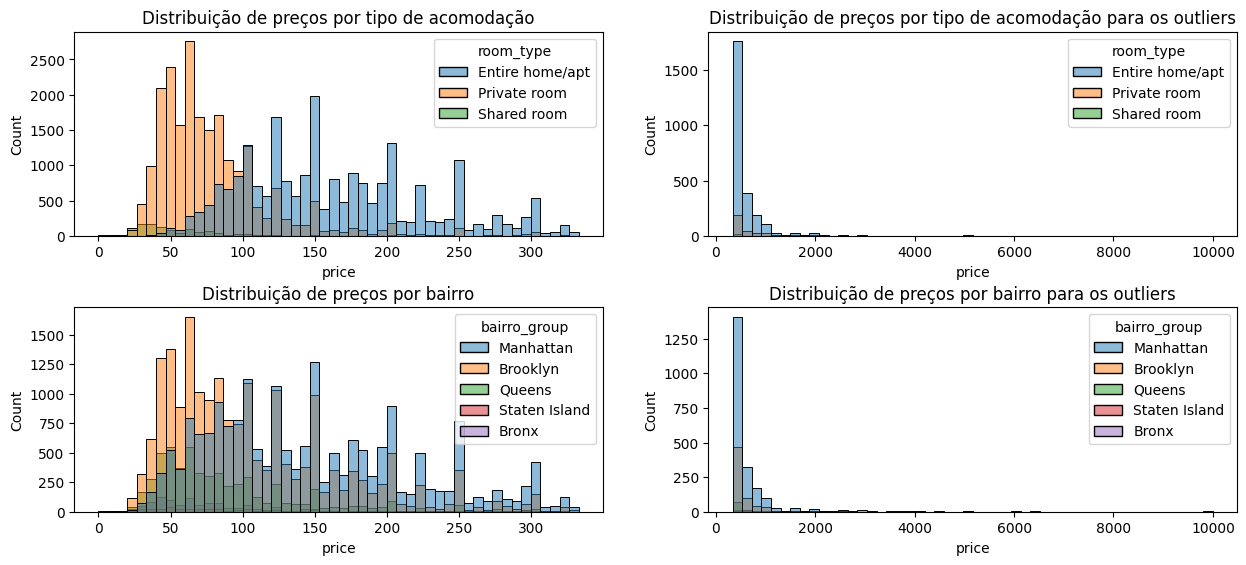

In [66]:
fig,axs = plt.subplots(2,2,figsize=(15,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

df_low = df.loc[df['price'] < upper_bound]
outliers = df.loc[df['price'] > upper_bound]
#outliers.nlargest(10,columns='price')

sns.histplot(data = df_low, x = 'price',hue = 'room_type',bins = 50, ax = axs[0][0])
axs[0][0].set_title('Distribuição de preços por tipo de acomodação')
sns.histplot(data = outliers, x = 'price', hue= 'room_type',bins = 50,ax = axs[0][1])
axs[0][1].set_title('Distribuição de preços por tipo de acomodação para os outliers')
sns.histplot(data = df_low, x = 'price',hue = 'bairro_group',bins = 50,ax = axs[1][0])
axs[1][0].set_title('Distribuição de preços por bairro')
sns.histplot(data = outliers, x = 'price', hue= 'bairro_group',bins = 50,ax = axs[1][1])
axs[1][1].set_title('Distribuição de preços por bairro para os outliers')

plt.show()

Vamos avaliar também a distribuição do mínimo de noites, número de reviews e disponibilidade da acomodação para os dois _datasets_.

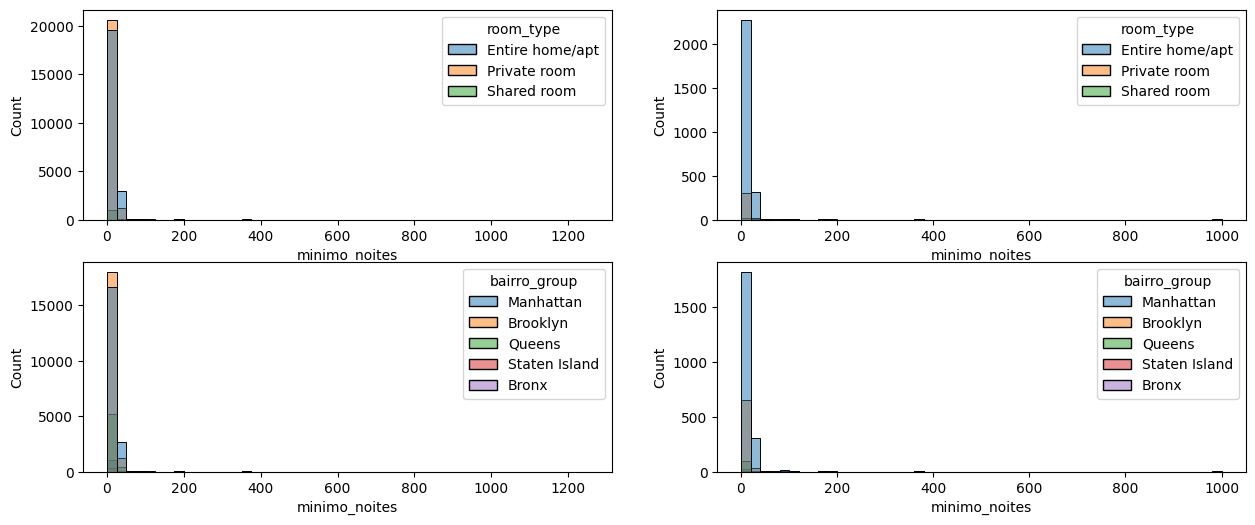

In [67]:
fig,axs = plt.subplots(2,2,figsize=(15,6))
sns.histplot(data = df_low, x = 'minimo_noites',hue = 'room_type',bins = 50, ax = axs[0][0])
sns.histplot(data = outliers, x = 'minimo_noites', hue= 'room_type',bins = 50,ax = axs[0][1])
sns.histplot(data = df_low, x = 'minimo_noites',hue = 'bairro_group',bins = 50,ax = axs[1][0])
sns.histplot(data = outliers, x = 'minimo_noites', hue= 'bairro_group',bins = 50,ax = axs[1][1])
plt.show()

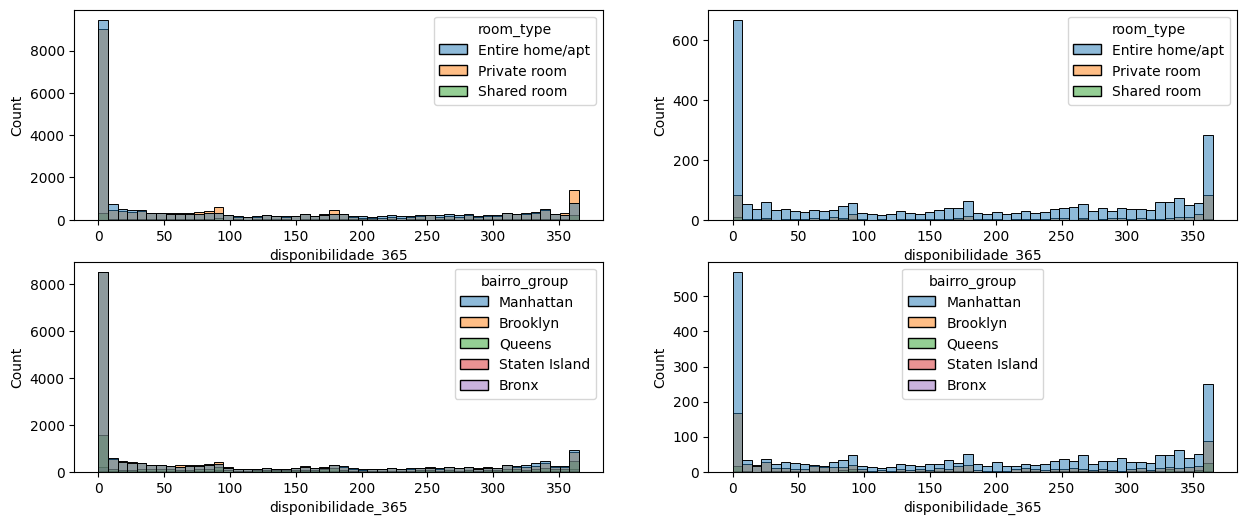

In [68]:
fig,axs = plt.subplots(2,2,figsize=(15,6))
sns.histplot(data = df_low, x = 'disponibilidade_365',hue = 'room_type',bins = 50, ax = axs[0][0])
sns.histplot(data = outliers, x = 'disponibilidade_365', hue= 'room_type',bins = 50,ax = axs[0][1])
sns.histplot(data = df_low, x = 'disponibilidade_365',hue = 'bairro_group',bins = 50,ax = axs[1][0])
sns.histplot(data = outliers, x = 'disponibilidade_365', hue= 'bairro_group',bins = 50,ax = axs[1][1])
plt.show()

In [69]:
df['n_dias_ocupados_por_ano'] = 365 - df['disponibilidade_365']
df['price_ano'] = df['n_dias_ocupados_por_ano']*df['price']
df_low = df.loc[df['price'] < upper_bound]
outliers = df.loc[df['price'] > upper_bound]

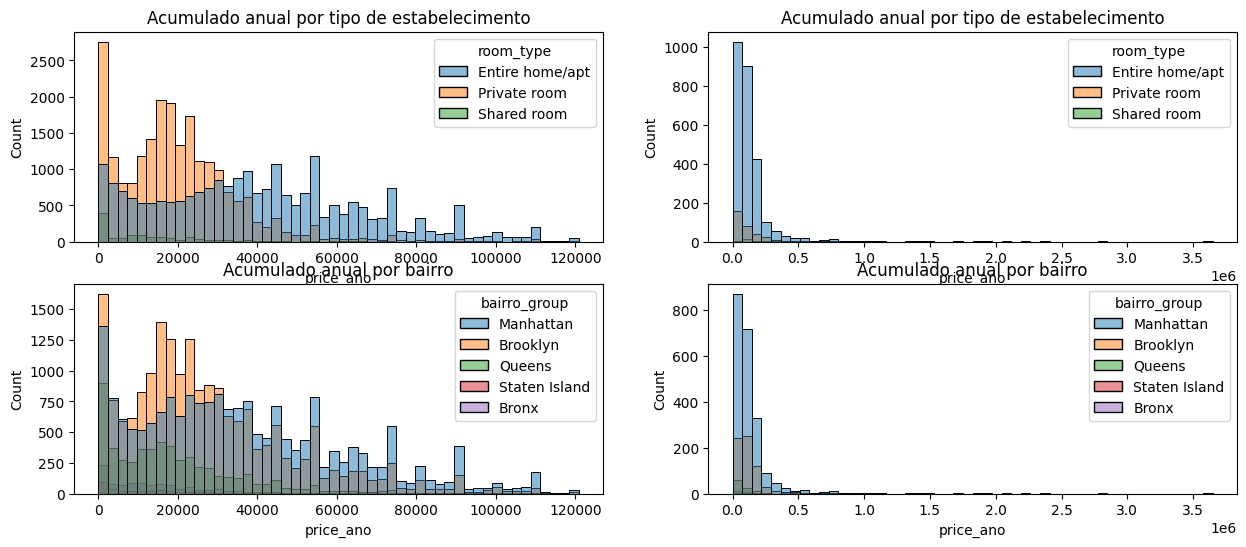

In [70]:
fig,axs = plt.subplots(2,2,figsize=(15,6))
sns.histplot(data = df_low, x = 'price_ano',hue = 'room_type',bins = 50, ax = axs[0][0])
axs[0][0].set_title('Acumulado anual por tipo de estabelecimento')
sns.histplot(data = outliers, x = 'price_ano', hue= 'room_type',bins = 50,ax = axs[0][1])
axs[0][1].set_title('Acumulado anual por tipo de estabelecimento')
sns.histplot(data = df_low, x = 'price_ano',hue = 'bairro_group',bins = 50,ax = axs[1][0])
axs[1][0].set_title('Acumulado anual por bairro')
sns.histplot(data = outliers, x = 'price_ano', hue= 'bairro_group',bins = 50,ax = axs[1][1])
axs[1][1].set_title('Acumulado anual por bairro')
plt.show()

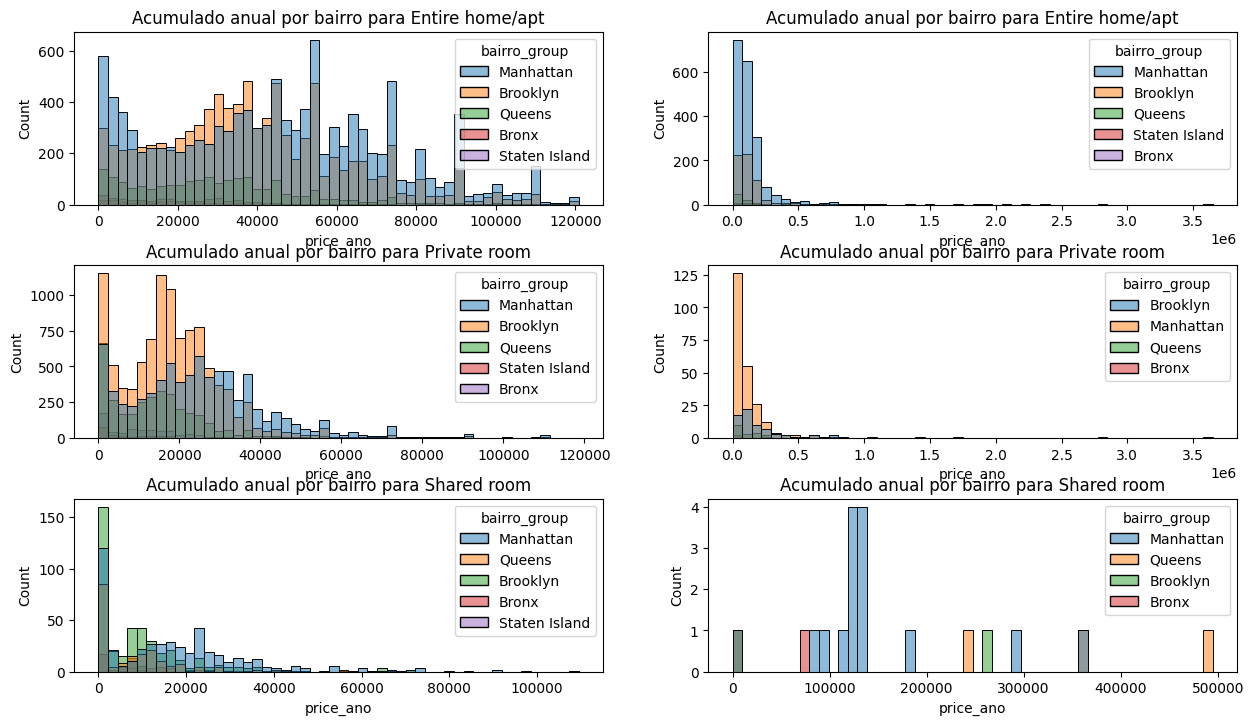

In [71]:
fig,axs = plt.subplots(3,2,figsize=(15,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.histplot(data = df_low.loc[df['room_type'] == 'Entire home/apt'], x = 'price_ano',hue = 'bairro_group',bins = 50,ax = axs[0][0])
axs[0][0].set_title('Acumulado anual por bairro para Entire home/apt')
sns.histplot(data = outliers.loc[df['room_type'] == 'Entire home/apt'], x = 'price_ano', hue= 'bairro_group',bins = 50,ax = axs[0][1])
axs[0][1].set_title('Acumulado anual por bairro para Entire home/apt')

sns.histplot(data = df_low.loc[df['room_type'] == 'Private room'], x = 'price_ano',hue = 'bairro_group',bins = 50,ax = axs[1][0])
axs[1][0].set_title('Acumulado anual por bairro para Private room')
sns.histplot(data = outliers.loc[df['room_type'] == 'Private room'], x = 'price_ano', hue= 'bairro_group',bins = 50,ax = axs[1][1])
axs[1][1].set_title('Acumulado anual por bairro para Private room')


sns.histplot(data = df_low.loc[df['room_type'] == 'Shared room'], x = 'price_ano',hue = 'bairro_group',bins = 50,ax = axs[2][0])
axs[2][0].set_title('Acumulado anual por bairro para Shared room')
sns.histplot(data = outliers.loc[df['room_type'] == 'Shared room'], x = 'price_ano', hue= 'bairro_group',bins = 50,ax = axs[2][1])
axs[2][1].set_title('Acumulado anual por bairro para Shared room')

plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df,x = 'disponibilidade_365' ,y = 'price',hue='room_type')
#plt.xlim([0,400])
#plt.ylim([0,400])
plt.show()

de acordo com o gráfico de dispersão acima, não parece haver relação entre a disponibilidade de um estabelecimento e seu preço. Por outro lado, os histogramas acima confirmam o que já havíamos concluído anteriormente. Manhattan é o local com aluguel mais caro, independente do tipo de acomodação.

Voltando aos estudos da variável `nome`.

In [72]:
nomes_outliers = ''.join(str(desc) for desc in outliers.nome).lower().split()
nomes_lowcost = ''.join(str(desc) for desc in df_low.nome).lower().split()

In [74]:
texto_outliers = ' '.join(palavra for palavra in nomes_outliers)
texto_lowcost =' '.join(palavra for palavra in nomes_lowcost)

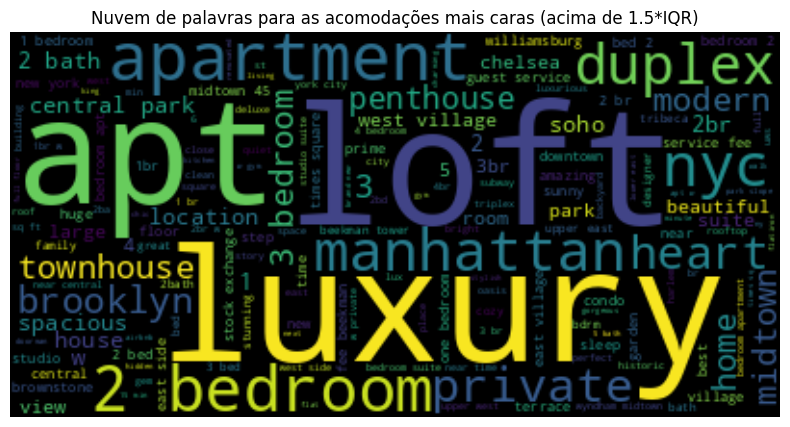

In [76]:
wordcloud = WordCloud(include_numbers=True).generate(texto_outliers)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de palavras para as acomodações mais caras (acima de 1.5*IQR)')
plt.show()

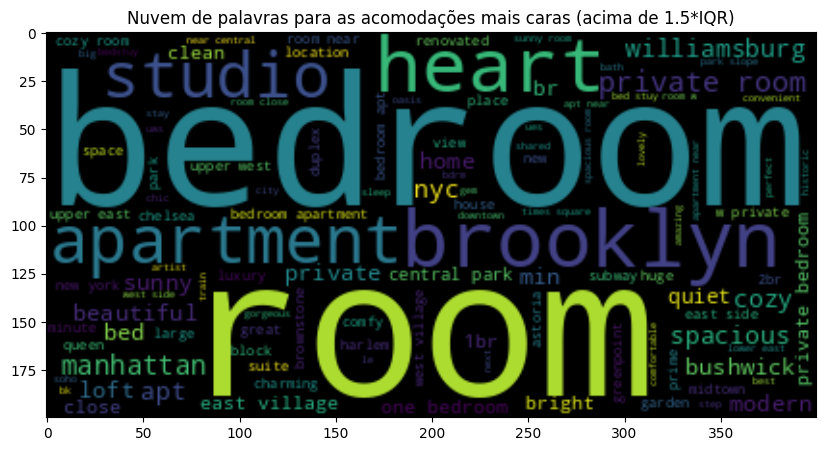

In [77]:
wordcloud = WordCloud().generate(texto_lowcost)
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de palavras para as acomodações mais caras (acima de 1.5*IQR)')
#plt.axis("off")
plt.show()

Como vemos, palavras como _Luxury_, _Manhattan_, _loft_, _duplex_ são indicadores de que a acomodação possui valores mais elevados.

Por fim, vamos fazer um mapa da região de estudo. Assim podemos visualizar melhor a localização das acomodações em contraste com o mapa da região de Nova York. 

## Mapa da região

In [109]:
#Referencia https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
#path = 'nyu_2451_34204/mn_bk_housing_2010'
path = 'Borough Boundaries/geo_export_f5810a23-40ad-4155-8123-7d4dbbc339f6.shp'
street_map = gpd.read_file(path)


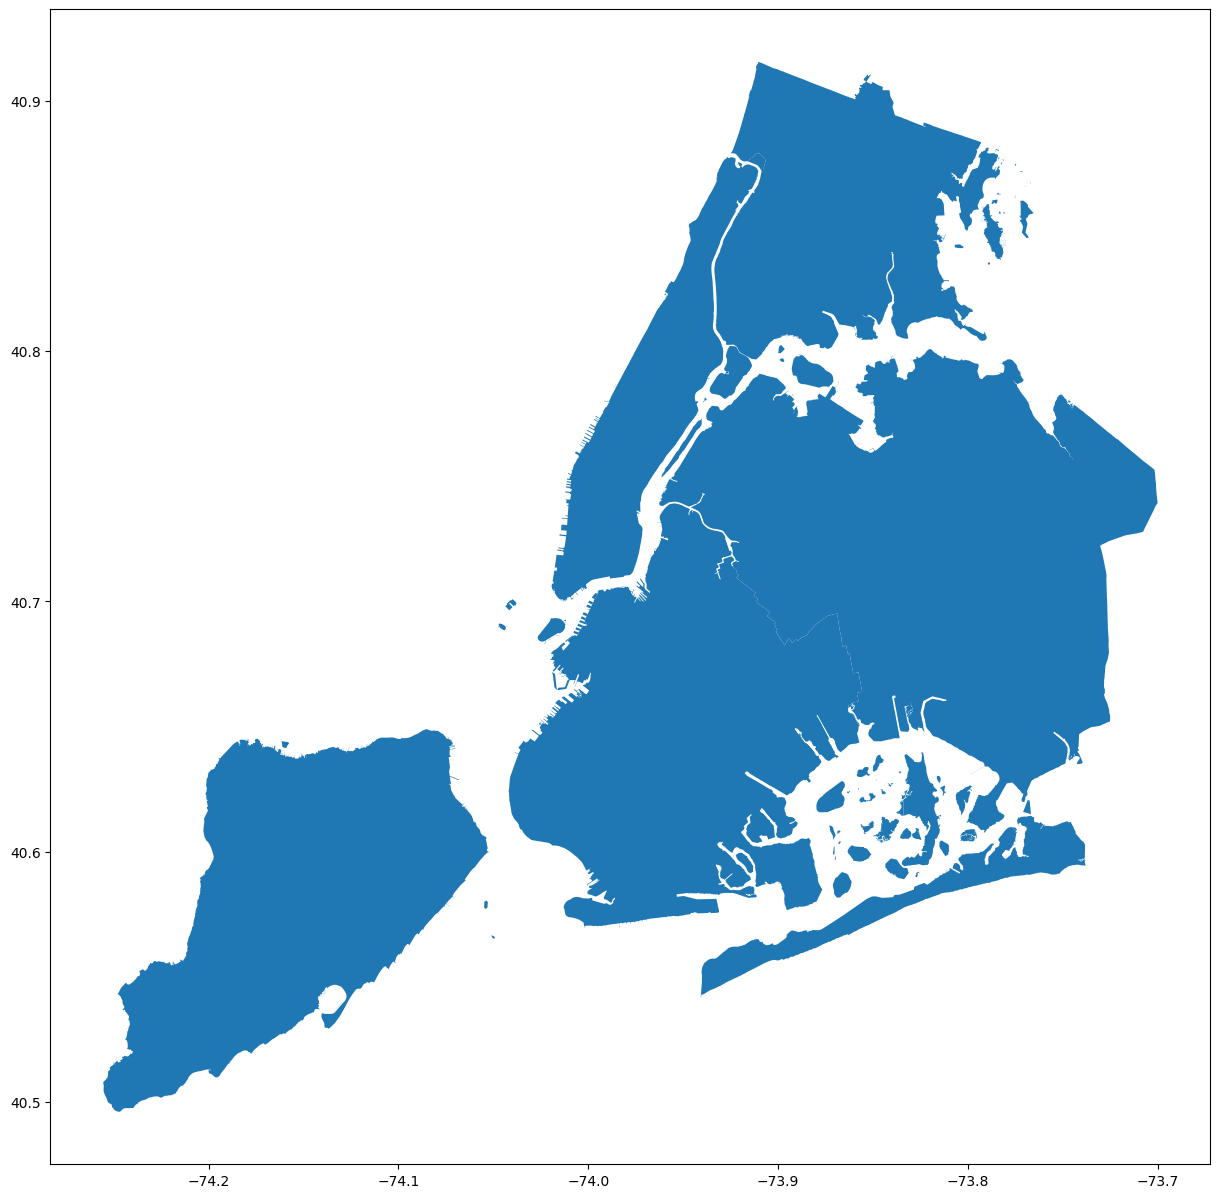

In [110]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [111]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

/home/marcio/Documentos/Portifolio_Marcio_DataScience/Lighthouse_Indicium/2024_1/NewYorkAlugueis/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [112]:
geo_df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,n_dias_ocupados_por_ano,price_ano,geometry
0,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10,2250,POINT (-73.98377 40.75362)
1,3647,the village of harlem....new york !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,0,0,POINT (-73.94190 40.80902)
2,3831,cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,171,15219,POINT (-73.95976 40.68514)
3,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,365,29200,POINT (-73.94399 40.79851)
4,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,236,47200,POINT (-73.97500 40.74767)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,356,24920,POINT (-73.94995 40.67853)
48890,36485057,affordable room in bushwick/east williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,329,13160,POINT (-73.93317 40.70184)
48891,36485431,sunny studio at historical neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,338,38870,POINT (-73.94867 40.81475)
48892,36485609,43rd st. time square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,363,19965,POINT (-73.99112 40.75751)


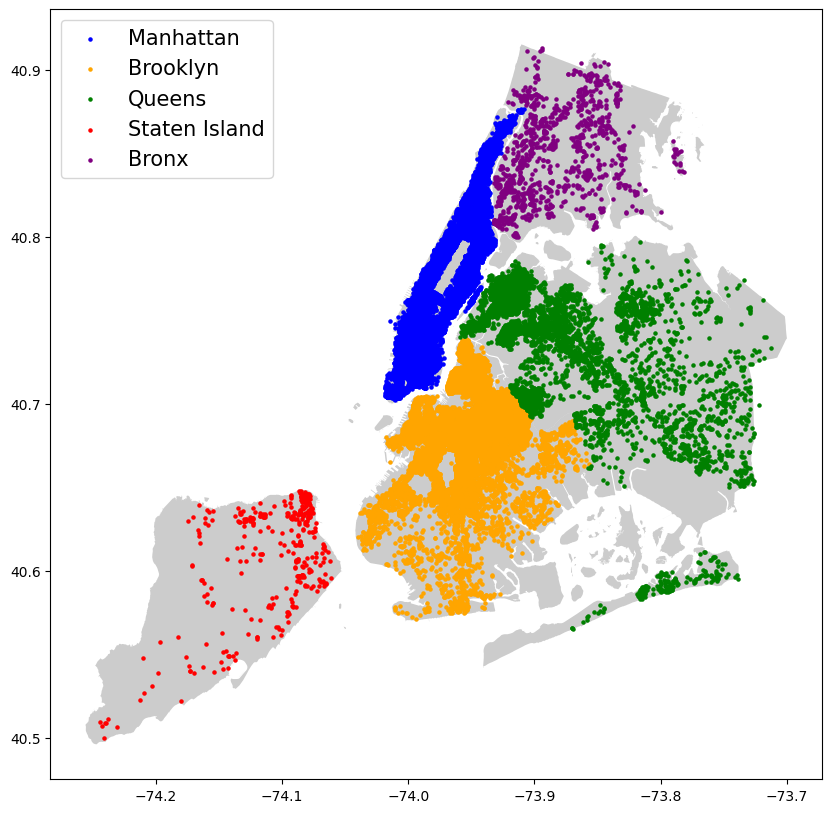

In [114]:
fig, ax = plt.subplots(figsize=(10,10))

street_map.plot(ax=ax, alpha=0.4, color='grey')

colors = ['blue','orange','green','red','purple']
bairro = df['bairro_group'].unique()

for color,neigh in zip(colors,bairro):
    geo_df[geo_df['bairro_group']==neigh].plot(ax=ax,
                markersize=20,
                color=color,
                marker= '.',
                label= neigh
               )

plt.legend(prop={'size':15})

In [116]:
#Requirements
#!pip freeze > requeriments.txt